In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
import matplotlib.patches as mpatches

In [2]:
df_body = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')

In [3]:
df_title = pd.read_csv('soc-redditHyperlinks-title.tsv', delimiter='\t')

In [24]:
df_usa = pd.read_csv('usa.csv')

In [5]:
df_title['SOURCE_SUBREDDIT'] = df_title['SOURCE_SUBREDDIT'].astype(str)

In [6]:
df_title['TARGET_SUBREDDIT'] = df_title['TARGET_SUBREDDIT'].astype(str)

In [120]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571927 entries, 0 to 571926
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   SOURCE_SUBREDDIT  571927 non-null  object
 1   TARGET_SUBREDDIT  571927 non-null  object
 2   POST_ID           571927 non-null  object
 3   TIMESTAMP         571927 non-null  object
 4   LINK_SENTIMENT    571927 non-null  int64 
 5   PROPERTIES        571927 non-null  object
 6   year              571927 non-null  int64 
 7   date              571927 non-null  object
 8   month             571927 non-null  int64 
 9   day               571927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 43.6+ MB


In [7]:
source =['usa', 'america', 'us', 'unitedstates','usofa', 'unitedstatesofamerica', 'US','USA','USofA','UnitedStatesofAmerica', 'whitehouse', 'republican','democrats','WhiteHouse']
target = ['guns','violence','black','muslin','islam','terrorism','crime','drugs','BLM','antivaccer','racewar','racism','shoot','riot','protest','assualt','suicide','kill','death','bomb','rape','sexual','bully','harass','porn']
pattern1 = '|'.join(source)
pattern2 = '|'.join(target)

In [8]:
source2 =['stock','wallstreet','bets']
target2 = ['guns','violence','black','muslin','islam','terror','crime','drugs','BLM','antivaccer','racewar','racism','shoot','riot','protest','assualt','suicide','kill','death','bomb','rape','sexual','bully','harass','kidnap','abduct']
pattern11 = '|'.join(source2)
pattern2 = '|'.join(target2)

In [200]:
df_graph= df_title.loc[(df_title['SOURCE_SUBREDDIT'].str.contains(pattern1,case=False)) & (df_title['TARGET_SUBREDDIT'].str.contains('politics',case=False))]

In [266]:
df_title.loc[(df_title['SOURCE_SUBREDDIT'].str.contains(pattern,case=False)) & (df_title['TARGET_SUBREDDIT'].str.contains(pattern2,case=False))]

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,year,date,month,day
1237,exmuslim,islam,1uiywp,2014-01-06 00:08:21,-1,"48.0,43.0,0.791666666667,0.0,0.104166666667,0....",2014,2014-01-06,1,6
4052,shitamericanssay,gunsarecool,1v9jda,2014-01-15 02:32:18,-1,"300.0,251.0,0.786666666667,0.0,0.116666666667,...",2014,2014-01-15,1,15
5041,muslimnofap,islam,1vj5vgs,2014-01-18 10:05:19,1,"29.0,27.0,0.827586206897,0.0,0.275862068966,0....",2014,2014-01-18,1,18
5762,exmuslim,islam,1vqgg6s,2014-01-20 19:29:31,1,"40.0,35.0,0.75,0.0,0.125,0.15,0.1,8.0,8.0,1.0,...",2014,2014-01-20,1,20
6491,exmuslim,islam,1vxo1b,2014-01-23 03:16:09,-1,"115.0,98.0,0.782608695652,0.0,0.0608695652174,...",2014,2014-01-23,1,23
...,...,...,...,...,...,...,...,...,...,...
565103,exmuslim,islam,66m2lss,2017-04-20 18:07:07,1,"86.0,75.0,0.779069767442,0.0,0.0697674418605,0...",2017,2017-04-20,4,20
566740,jesuschristreddit,blackpeopletwitter,674cqzs,2017-04-23 12:49:21,1,"69.0,60.0,0.840579710145,0.0,0.0869565217391,0...",2017,2017-04-23,4,23
567308,exmuslim,islam,67arlks,2017-04-24 10:54:31,1,"121.0,105.0,0.793388429752,0.0,0.0743801652893...",2017,2017-04-24,4,24
569433,jesuschristreddit,blackpeopletwitter,67vbu5s,2017-04-27 04:59:36,1,"21.0,20.0,0.857142857143,0.0,0.333333333333,0....",2017,2017-04-27,4,27


In [261]:
bets=df_title.loc[(df_title['SOURCE_SUBREDDIT'].str.contains(pattern11,case=False))]

In [262]:
bets.to_csv("bets.csv")

In [207]:
df_911.to_csv("911_data.csv")

In [203]:
df_graph.to_csv("nodes.csv")

In [22]:
#new_frame=df_body.groupby('SOURCE_SUBREDDIT')


In [9]:
source_list_body = df_body['SOURCE_SUBREDDIT']
source_list_body = source_list_body.unique().tolist()

In [10]:
target_list_body = df_body['TARGET_SUBREDDIT']
target_list_body = target_list_body.unique().tolist()

In [11]:
list_source_target = source_list_body
list_source_target.extend(target_list_body)

In [12]:
Vertices = list(dict.fromkeys(source_list_body))
Vertices.sort()
print("Unique Vertices -",len(Vertices))

Unique Vertices - 35776


In [13]:
x_edges = zip(df_body['SOURCE_SUBREDDIT'],df_body['TARGET_SUBREDDIT'])
Edge_list = list(x_edges)
Edges_list = list(dict.fromkeys(Edge_list))
print("Unique Edges -",len(Edges_list))

Unique Edges - 137821


In [14]:
#Edge list
vert = len(Vertices)

A_Mat = np.zeros((vert,vert),dtype=int)
for i in Edges_list:
    a = Vertices.index(i[0])
    b = Vertices.index(i[1])
    A_Mat[a][b]=1

In [15]:
#Adj Mat
Adj_list = list()
for s in range(vert):
    Adj_list.append([])

for i in Edges_list:
    a = Vertices.index(i[0])
    b = Vertices.index(i[1])

    Adj_list[a].append(i[1])

In [16]:
#Adj list
V_count = 0    
out_degree = dict()
cnt = list()
for i in range(len(Adj_list)):
    V_count = len(Adj_list[i])
    x = [Vertices[i],V_count]
    cnt.append(x)
    out_degree[Vertices[i]] = Adj_list[i]

In [17]:
def custom_clust(elem):
    return(elem[1])

def custom_func(elem):
    return(elem[1])

In [18]:
cnt.sort(key=custom_func,reverse=True)
cnt
cnt_new = cnt[:10]
popularName = [x[0] for x in cnt_new]
popularNo = [x[1] for x in cnt_new]
y_pos = np.arange(len(popularName))

In [33]:
popularName

['subredditdrama',
 'copypasta',
 'drama',
 'subredditoftheday',
 'outoftheloop',
 'circlejerkcopypasta',
 'tipofmypenis',
 'shitliberalssay',
 'justunsubbed',
 'conspiracy']

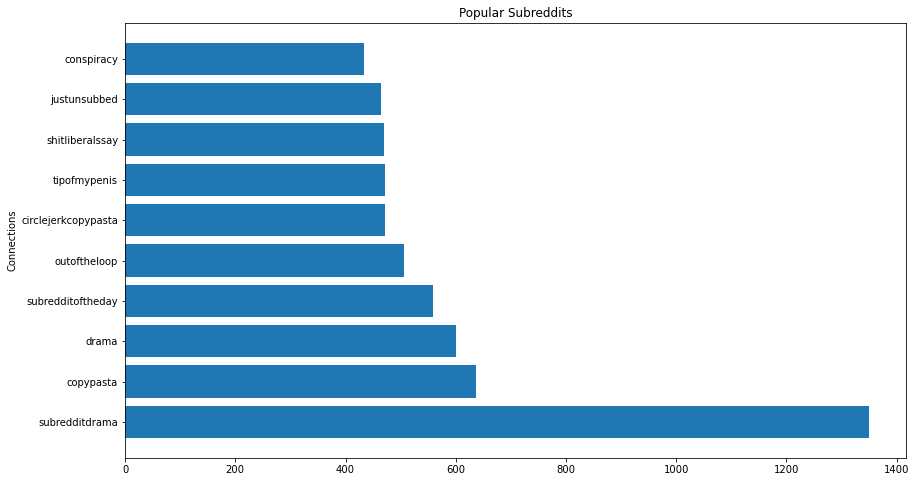

In [34]:
plt.figure(figsize=(14, 8))
plt.barh(popularName, popularNo)
#plt.bar(y_pos, popularNo, align='center', alpha=0.8,color='#F78F1E')
#plt.xticks(y_pos, popularName,rotation='vertical')
plt.ylabel('Connections')
plt.title('Popular Subreddits')
plt.show()

<ipython-input-35-4b0d455dae86>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(popularName, rotation=45)


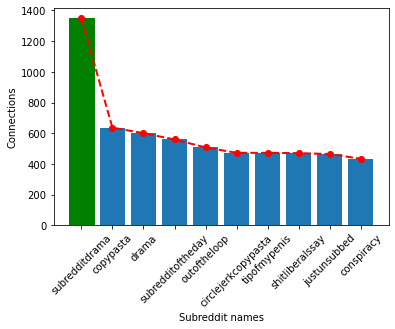

In [35]:
fig,ax= plt.subplots()
ax.bar(popularName, popularNo)[0].set_color("green")
ax.set_xticklabels(popularName, rotation=45)
ax.set_xlabel("Subreddit names")
ax.set_ylabel("Connections")
ax.plot(popularName,popularNo, color='red', marker ='o', linestyle = 'dashed', linewidth = 2)
plt.show()

In [25]:
df_usa

,Unnamed: 0,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,53,shitamericanssay,funny,1u5uv0s,2014-01-01 09:19:18,1,"43.0,37.0,0.697674418605,0.093023255814,0.1395..."
1,58,shitamericanssay,worldpolitics,1u5y76s,2014-01-01 09:19:18,1,"105.0,88.0,0.733333333333,0.0380952380952,0.09..."
2,71,shitamericanssay,askreddit,1u645bs,2014-01-01 09:46:35,1,"65.0,57.0,0.815384615385,0.0,0.123076923077,0...."
3,74,floridagators,bestof,1u651es,2014-01-01 13:07:19,1,"94.0,81.0,0.787234042553,0.0212765957447,0.095..."
4,226,srsbusiness,changemyview,1u7v8js,2014-01-02 12:34:17,1,"165.0,139.0,0.8,0.0,0.0606060606061,0.16363636..."
...,...,...,...,...,...,...,...
28454,571830,jesuschristreddit,imgoingtohellforthis,68hyg8s,2017-04-30 13:25:25,1,"44.0,39.0,0.840909090909,0.0,0.136363636364,0...."
28455,571838,justiceserved,news,68i0kzs,2017-04-30 15:22:11,1,"108.0,94.0,0.824074074074,0.0,0.157407407407,0..."
28456,571860,elitepatreus,elitedangerous,68i65zs,2017-04-30 14:56:08,1,"104.0,90.0,0.807692307692,0.0192307692308,0.18..."
28457,571861,elite_dangerous,elitedangerous,68i67ds,2017-04-30 14:56:18,1,"104.0,90.0,0.807692307692,0.0192307692308,0.18..."


In [2]:
df_combine1 = pd.read_csv("trump.csv")

In [6]:
df_combine2= pd.read_csv("Nodedata2.csv")
df = [df_combine1, df_combine2]
df_combined_final = pd.concat(df)

In [7]:
df_combined_final

,Unnamed: 0,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,year,date,month,day,count,Unnamed: 12
0,230926,the_donald,whiterights,3getny,2015-08-09 19:07,-1,"190.0,166.0,0.778947368421,0.0157894736842,0.0...",2015.0,2015-08-09,8.0,9.0,163.0,32.6
1,231600,youcantstumpthetrump,sandersforpresident,3gk8e0,2015-08-11 0:22,-1,"110.0,97.0,0.836363636364,0.0,0.0909090909091,...",2015.0,2015-08-11,8.0,11.0,-1.0,-0.2
2,235875,hillaryclinton,sandersforpresident,3hhnz1s,2015-08-18 15:13,1,"95.0,87.0,0.842105263158,0.0,0.0947368421053,0...",2015.0,2015-08-18,8.0,18.0,38.0,7.6
3,268901,the_donald,sandersforpresident,3pyylv,2015-10-23 23:23,-1,"94.0,83.0,0.81914893617,0.0,0.106382978723,0.1...",2015.0,2015-10-23,10.0,23.0,163.0,32.6
4,275293,shittrumpsays,votetrumpyouloser,3rp5e7s,2015-11-06 2:07,1,"74.0,66.0,0.851351351351,0.0,0.148648648649,0....",2015.0,2015-11-06,11.0,6.0,2.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,286450,subredditdrama,vive,68govn,2017-04-30 10:10:03,-1,"554.0,480.0,0.752707581227,0.00902527075812,0....",NaN,NaN,NaN,NaN,NaN,NaN
17531,286468,subredditdrama,gifrecipes,68h22ls,2017-04-30 11:45:53,1,"839.0,780.0,0.753277711561,0.0333730631704,0.0...",NaN,NaN,NaN,NaN,NaN,NaN
17532,286531,tipofmypenis,porn,68i3fus,2017-04-30 14:53:45,1,"495.0,417.0,0.769696969697,0.00808080808081,0....",NaN,NaN,NaN,NaN,NaN,NaN
17533,286544,justunsubbed,thriftstorehauls,68ib3es,2017-04-30 16:23:47,1,"6332.0,5154.0,0.765634870499,0.00505369551485,...",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
new_frame = df_combined_final.groupby(['SOURCE_SUBREDDIT','LINK_SENTIMENT']).size().reset_index(name='counts')
new_frame.sort_values('counts',ascending=False)

,SOURCE_SUBREDDIT,LINK_SENTIMENT,counts
62,subredditdrama,1,3228
46,outoftheloop,1,1820
55,shitliberalssay,1,1561
14,copypasta,1,1452
61,subredditdrama,-1,1437
...,...,...,...
86,trump_fashions,1,1
87,trump_god,1,1
34,impeachtrump,1,1
33,impeachtrump,-1,1


In [9]:
new_frame_positive = new_frame.loc[new_frame['LINK_SENTIMENT'] == 1]
new_frame_positive = new_frame_positive.sort_values('counts',ascending=False)

In [18]:
counts_pos = [3567,1097,733,700,580,546,520,510,460,450]
counts_neg = [1604,764,329,300,268,289,279,260,200,200]

In [11]:
new_frame_negative = new_frame.loc[new_frame['LINK_SENTIMENT'] == -1]
new_frame_negative= new_frame_negative.sort_values('counts',ascending=False)

In [12]:
new_frame_positive=new_frame_positive.head(10)

In [13]:
new_frame_positive

,SOURCE_SUBREDDIT,LINK_SENTIMENT,counts
62,subredditdrama,1,3228
46,outoftheloop,1,1820
55,shitliberalssay,1,1561
14,copypasta,1,1452
84,tipofmypenis,1,1201
12,conspiracy,1,1181
10,circlejerkcopypasta,1,1137
36,justunsubbed,1,930
22,drama,1,788
64,subredditoftheday,1,580


In [32]:
new_frame_negative=new_frame_negative.head(10)

In [33]:
new_frame_negative

,SOURCE_SUBREDDIT,LINK_SENTIMENT,counts
2035,shitamericanssay,-1,717
1122,jesuschristreddit,-1,169
1246,justunsubbed,-1,143
445,circlejerkaustralia,-1,114
2554,wtfdidijustread,-1,103
1855,pussified,-1,94
13,abuseinterrupted,-1,75
2359,upvotedbecausegirl,-1,64
720,exmuslim,-1,64
1210,justneckbeardthings,-1,47


No handles with labels found to put in legend.


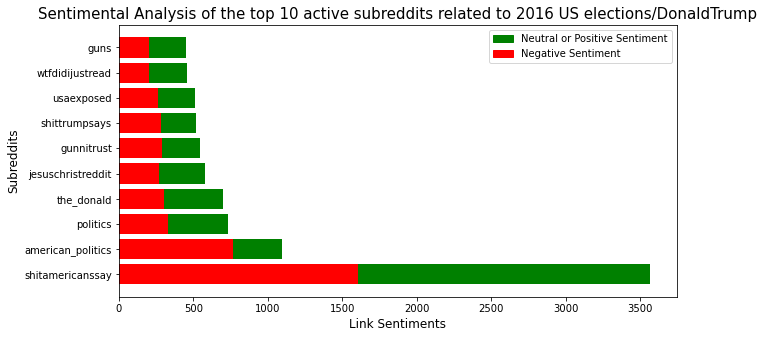

In [19]:
fig,ax= plt.subplots(1,1,figsize=(10,5))

ax.barh(names,counts_pos,color='green')
ax.barh(names,counts_neg,color='red')
ax.set_xlabel('Link Sentiments',fontsize=12)
ax.set_ylabel('Subreddits',fontsize=12)
ax.set_title('Sentimental Analysis of the top 10 active subreddits related to 2016 US elections/DonaldTrump',fontsize=15)
ax.legend(loc="upper right")

red_patch = mpatches.Patch(color='red', label='Negative Sentiment')
green_patch = mpatches.Patch(color='green', label='Neutral or Positive Sentiment')

plt.legend(handles=[green_patch,red_patch])

In [44]:
df_body['year'] = pd.DatetimeIndex(df_body['TIMESTAMP']).year
df_body['date']=pd.to_datetime(df_body['TIMESTAMP']).dt.date
df_body['month']=pd.to_datetime(df_body.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.month
df_body['day']=pd.to_datetime(df_body.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.day

In [45]:
df_body

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,year,date,month,day
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",2013,2013-12-31,12,31
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",2013,2013-12-31,12,31
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",2014,2014-01-01,1,1
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",2013,2013-12-31,12,31
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",2014,2014-01-01,1,1
...,...,...,...,...,...,...,...,...,...,...
286556,negareddit,debatefascism,68im20s,2017-04-30 16:31:26,1,"441.0,405.0,0.775510204082,0.0294784580499,0.0...",2017,2017-04-30,4,30
286557,mildlynomil,justnomil,68imlas,2017-04-30 04:19:03,1,"2226.0,1855.0,0.786163522013,0.00224618149146,...",2017,2017-04-30,4,30
286558,mmorpg,blackdesertonline,68ip5os,2017-04-30 16:54:08,1,"1100.0,909.0,0.778181818182,0.00181818181818,0...",2017,2017-04-30,4,30
286559,electricskateboards,askreddit,68ipb2s,2017-04-30 16:41:53,1,"1876.0,1567.0,0.78144989339,0.00692963752665,0...",2017,2017-04-30,4,30


In [16]:
names=['shitamericanssay','american_politics','politics','the_donald','jesuschristreddit','gunnitrust', 'shittrumpsays','usaexposed','wtfdidijustread','guns']

In [46]:
year_2013 = df_body[df_body.year == 2013] 
dec_2013 = year_2013[year_2013.month==12]
year_2013_new = dec_2013[dec_2013.day==31]
len(year_2013_new)

7

In [47]:
year_2014 = df_body[df_body.year == 2014] 
dec_2014 = year_2014[year_2014.month==12]
year_2014_new = dec_2014[dec_2014.day==31]
len(year_2014_new)

160

In [48]:
year_2015 = df_body[df_body.year == 2015] 
last_month_2015 = year_2015[year_2015.month==12]
year_2015_new = last_month_2015[last_month_2015.day==31]
len(year_2015_new)

250

In [49]:
year_2016 = df_body[df_body.year == 2016] 
last_month_2016 = year_2016[year_2016.month==12]
year_2016_new = last_month_2016[last_month_2016.day==31]
len(year_2016_new)

216

In [50]:
years_len = [len(year_2013_new),len(year_2014_new),len(year_2015_new),len(year_2016_new)]
years = ['2013','2014','2015','2016']

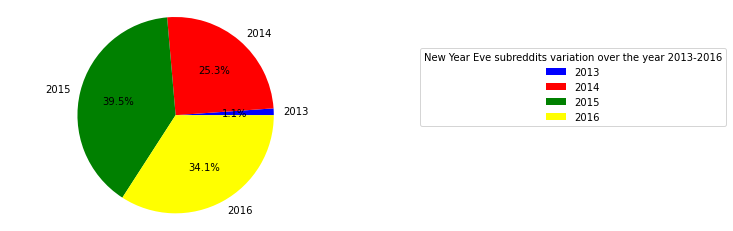

In [51]:
colors = ["blue", "red", "green", "yellow"]
plt.pie(years_len, colors=colors, labels=years, startangle=0, autopct='%.1f%%')
plt.axis('equal')
plt.legend(years ,title="New Year Eve subreddits variation over the year 2013-2016", bbox_to_anchor=(1.8,0.6),loc='right', bbox_transform=plt.gcf().transFigure)
plt.show()

In [52]:
df_title['year'] = pd.DatetimeIndex(df_title['TIMESTAMP']).year
df_title['date']=pd.to_datetime(df_title['TIMESTAMP']).dt.date
df_title['month']=pd.to_datetime(df_title.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.month
df_title['day']=pd.to_datetime(df_title.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.day

In [53]:
year_2013_title = df_title[df_title.year == 2013] 
dec_2013_title = year_2013_title[year_2013_title.month==12]
year_2013_title = dec_2013_title[dec_2013_title.day==31]
len(year_2013_title)

27

In [54]:
year_2014_title = df_title[df_title.year == 2014] 
dec_2014_title = year_2014_title[year_2014_title.month==12]
year_2014_title = dec_2014_title[dec_2014_title.day==31]
len(year_2014_title)

343

In [55]:
year_2015_title = df_title[df_title.year == 2015] 
dec_2015_title = year_2015_title[year_2015_title.month==12]
year_2015_title = dec_2015_title[dec_2015_title.day==31]
len(year_2015_title)

425

In [56]:
year_2016_title = df_title[df_title.year == 2016] 
dec_2016_title = year_2016_title[year_2016_title.month==12]
year_2016_title = dec_2016_title[dec_2016_title.day==31]
len(year_2016_title) 

515

In [57]:
years_len_title = [len(year_2013_title),len(year_2014_title),len(year_2015_title),len(year_2016_title)]


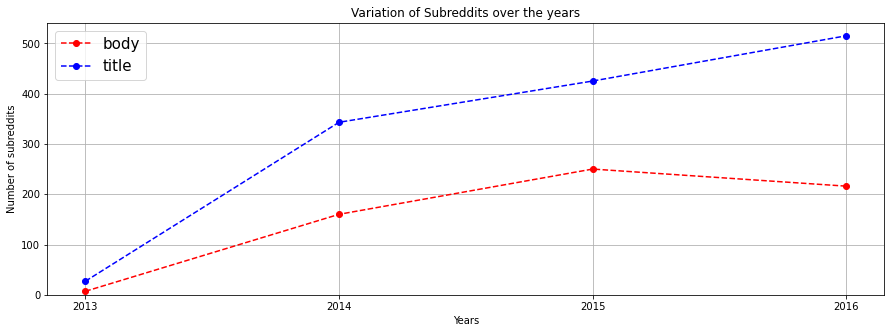

In [58]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(years,years_len, "r-o",linestyle='dashed', label = 'body')
ax1.plot(years,years_len_title, "b-o",linestyle='dashed', label = 'title')
ax1.set_ylim(0,)
ax1.grid(None)
ax1.legend(loc="upper left", fontsize = 15)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of subreddits');

plt.title('Variation of Subreddits over the years')
plt.show()